## Importing our dataset that we downloaded from Kaggle



In [67]:
import pandas as pd

ted = pd.read_csv("E:/python2/ted_main.csv")


#reordering our collumns depending on our preferences 
ted = ted[['main_speaker','title','event','comments',
           'views','duration', 'languages', 'num_speaker', 
           'film_date','published_date','speaker_occupation',  
           'tags','ratings','name','url','description', 'related_talks' ]]

## Data Preperation

*Fillm_date and published_date collumns are in Unix timpestamp date format, we need to change them into human readeable one. We will use datetime package* 



In [68]:
import datetime

ted['film_date'] = ted['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
ted['published_date'] = ted['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

ted.head()


,main_speaker,title,event,comments,views,duration,languages,num_speaker,film_date,published_date,speaker_occupation,tags,ratings,name,url,description,related_talks
0,Ken Robinson,Do schools kill creativity?,TED2006,4553,47227110,1164,60,1,25-02-2006,27-06-2006,Author/educator,"['children', 'creativity', 'culture', 'dance',...","[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",Ken Robinson: Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,Sir Ken Robinson makes an entertaining and pro...,"[{'id': 865, 'hero': 'https://pe.tedcdn.com/im..."
1,Al Gore,Averting the climate crisis,TED2006,265,3200520,977,43,1,25-02-2006,27-06-2006,Climate advocate,"['alternative energy', 'cars', 'climate change...","[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",Al Gore: Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,With the same humor and humanity he exuded in ...,"[{'id': 243, 'hero': 'https://pe.tedcdn.com/im..."
2,David Pogue,Simplicity sells,TED2006,124,1636292,1286,26,1,24-02-2006,27-06-2006,Technology columnist,"['computers', 'entertainment', 'interface desi...","[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",David Pogue: Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,New York Times columnist David Pogue takes aim...,"[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i..."
3,Majora Carter,Greening the ghetto,TED2006,200,1697550,1116,35,1,26-02-2006,27-06-2006,Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...","[{'id': 3, 'name': 'Courageous', 'count': 760}...",Majora Carter: Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,"In an emotionally charged talk, MacArthur-winn...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i..."
4,Hans Rosling,The best stats you've ever seen,TED2006,593,12005869,1190,48,1,22-02-2006,28-06-2006,Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...","[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",Hans Rosling: The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,You've never seen data presented like this. Wi...,"[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i..."


In [69]:
#let's see who are the speakers who's talks have generated the most views and what is their occupation 
#this can be done with pandans
import pandas as pd
pop_talks = ted[['main_speaker', 'views','speaker_occupation']].sort_values('views', ascending=False)[:10]
pop_talks

,main_speaker,views,speaker_occupation
0,Ken Robinson,47227110,Author/educator
1346,Amy Cuddy,43155405,Social psychologist
677,Simon Sinek,34309432,Leadership expert
837,Brené Brown,31168150,Vulnerability researcher
452,Mary Roach,22270883,Writer
1776,Julian Treasure,21594632,Sound consultant
201,Jill Bolte Taylor,21190883,Neuroanatomist
5,Tony Robbins,20685401,Life coach; expert in leadership psychology
2114,James Veitch,20475972,Comedian and writer
1416,Cameron Russell,19787465,Model


## Occupation of speakers 

In [70]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy

<function matplotlib.pyplot.show(close=None, block=None)>

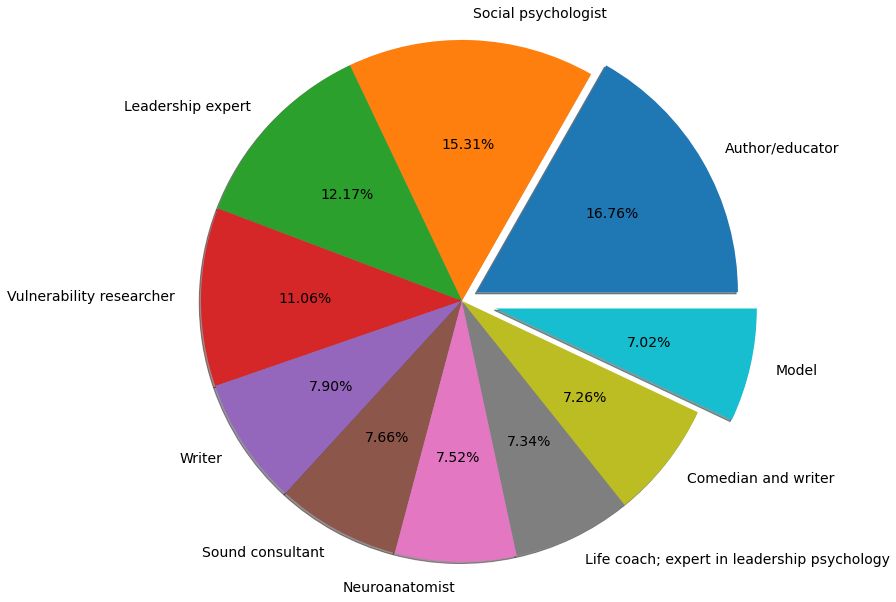

In [71]:
views = pop_talks['views']
occupation = numpy.array(pop_talks['speaker_occupation'])

plt.rcParams.update({'font.size': 14})


plt.axis("equal") #we are making our pie chart equally distributed
plt.pie(views, labels=occupation,radius=3, shadow =True, explode=[0.2,0,0,0,0,0,0,0,0,0.4], autopct = '%.2f%%')

plt.show #in order to remove extra lables 

In [72]:
# Which occupation should you choose if you want to become a TED Speaker? 

In [73]:
#for bar plots we will use seaborn package
import seaborn as sns

occupation_ted = ted.groupby('speaker_occupation').count().reset_index()[['speaker_occupation', 'comments']]
occupation_ted.columns = ['occupation', 'appearances']
occupation_ted = occupation_ted.sort_values('appearances', ascending=False)

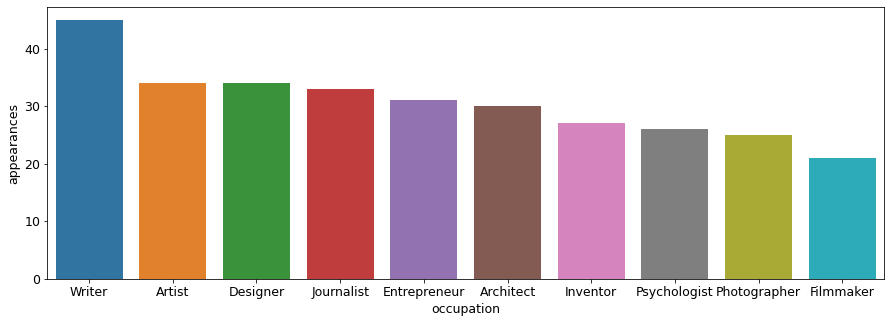

In [74]:
plt.rcParams.update({'font.size': 12.5})
plt.figure(figsize=(15,5))
sns.barplot(x='occupation', y='appearances', data=occupation_ted.head(10))
plt.show()

## Number of filmed  talks over the years 

<AxesSubplot:xlabel='year', ylabel='talks'>

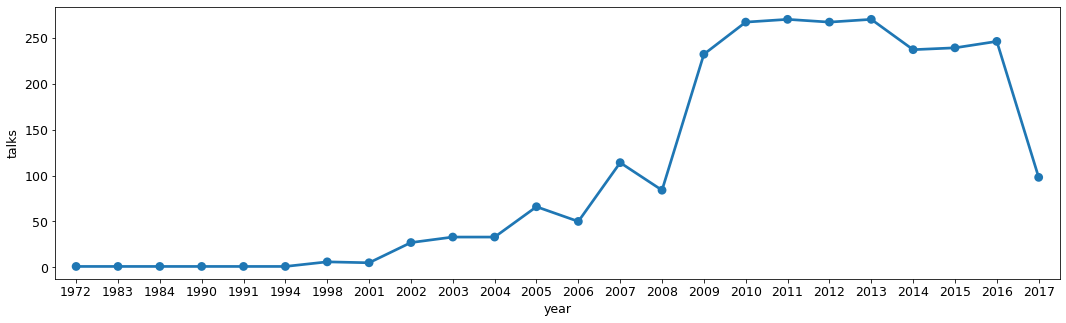

In [85]:
ted['year'] = ted['film_date'].apply(lambda x: x.split('-')[2])
year_ted = pd.DataFrame(ted['year'].value_counts().reset_index())
year_ted.columns = ['year', 'talks']
year_ted = year_ted.sort_values('year', ascending=True)
plt.figure(figsize=(18,5))
sns.pointplot(x='year', y='talks', data=year_ted)

## Descriptive statistics of comments 

In [91]:
round(ted['comments'].describe())

count    2550.0
mean      192.0
std       282.0
min         2.0
25%        63.0
50%       118.0
75%       222.0
max      6404.0
Name: comments, dtype: float64

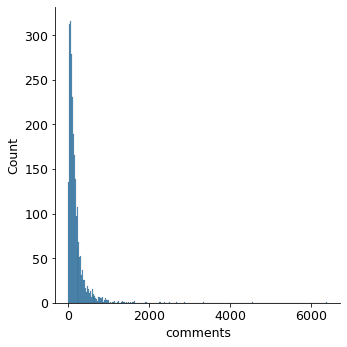

In [83]:
sns.displot(ted['comments'])

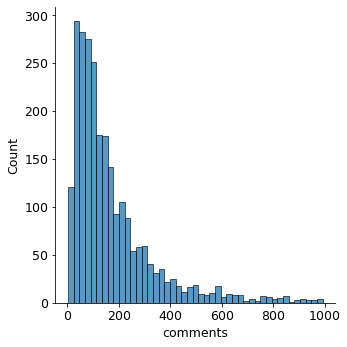

In [82]:
sns.displot(ted[ted['comments'] < 1000]['comments'])

## Descriptive statistics of views 

In [88]:
round(ted['views'].describe())

count        2550.0
mean      1698297.0
std       2498479.0
min         50443.0
25%        755793.0
50%       1124524.0
75%       1700760.0
max      47227110.0
Name: views, dtype: float64

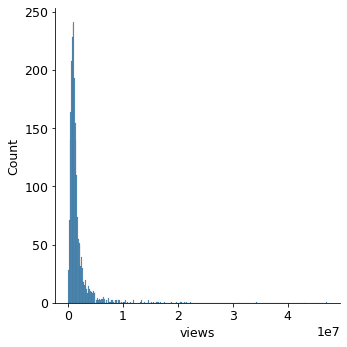

In [90]:
sns.displot(ted['views'])

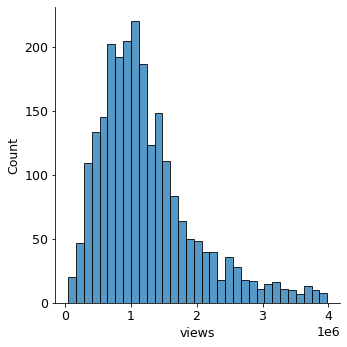

In [96]:
sns.displot(ted[ted['views'] < 4000000] ['views'])

## Descriptive statistics of languages 

In [97]:
round(ted['languages'].describe())

count    2550.0
mean       27.0
std        10.0
min         0.0
25%        23.0
50%        28.0
75%        33.0
max        72.0
Name: languages, dtype: float64

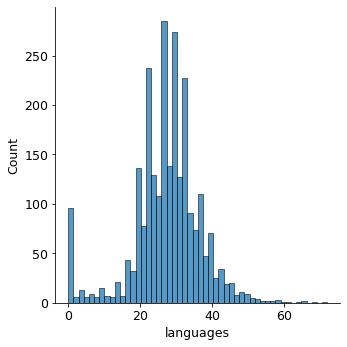

In [79]:
sns.displot(ted['languages'])